In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
df= pd.read_csv("TimeSeriesDatasetModified.csv")

In [4]:
start_date='04/02/2018'
end_date='08/09/2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

In [5]:
start_date='08/16/2021'
end_date='01/27/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 25)             2700      
                                                                 
 lstm_1 (LSTM)               (None, 10)                1440      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 4151 (16.21 KB)
Trainable params: 4151 (16.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 3s 11ms/step - loss: 0.2625
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2547
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2479
Epoch 4/50
3/3 [==============================] - 0s 6

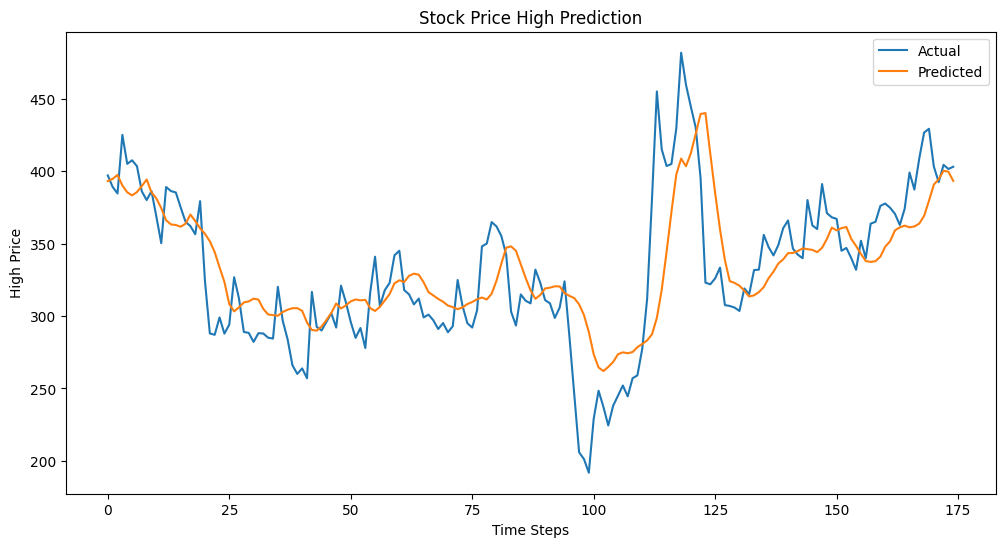

1/1 [==============================] - 0s 72ms/step
Predicted Values for Next 112 Time Steps:
[[393.24045]
 [379.1732 ]
 [366.75702]
 [356.39487]
 [348.15536]
 [341.85822]
 [337.17627]
 [333.733  ]
 [331.2445 ]
 [329.46878]
 [328.21323]
 [327.3312 ]
 [326.71448]
 [326.28464]
 [325.9857 ]
 [325.77814]
 [325.63416]
 [325.53436]
 [325.46524]
 [325.4174 ]
 [325.38425]
 [325.3613 ]
 [325.34543]
 [325.33444]
 [325.32687]
 [325.32162]
 [325.31796]
 [325.31543]
 [325.3137 ]
 [325.3125 ]
 [325.31165]
 [325.3111 ]
 [325.3107 ]
 [325.3104 ]
 [325.3102 ]
 [325.31006]
 [325.30997]
 [325.3099 ]
 [325.30988]
 [325.30988]
 [325.30988]
 [325.3098 ]
 [325.3098 ]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.30978]
 [325.309

In [1]:


# Load your stock dataset
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Specify your desired start and end dates
start_date='04-02-2018'
end_date='09-08-2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]



# Filter the data based on the specified date range
# filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract the 'High' column for modeling
data = dftrain['bdl_High'].values.reshape(-1, 1)
# data_test=dftest['bdl_High'].values.reshape(-1, 1)

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# data_test=scaler.transform(data_test)


# Create sequences and labels for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5 # Adjust this based on your dataset and task
X_train, y_train = create_sequences(data, sequence_length)
# X_test, y_train = create_sequences(data_test, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(25, activation='relu', input_shape=(sequence_length, 1) ,return_sequences= True))
model.add(LSTM(10, activation='relu', return_sequences= False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions
y_pred = model.predict(X_train)

# Inverse transform the predictions and actual values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_train = scaler.inverse_transform(y_train)

# Calculate RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)
mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price High Prediction')
plt.xlabel('Time Steps')
plt.ylabel('High Price')
plt.show()

# Predict the next 112 values (36 + 76)
predicted_values_next_76 = []

# Use the last sequence from the test data as the initial input
current_input = X_train[-1]

# Predict the next 112 values
for _ in range(76):
    current_input = current_input.reshape(1, sequence_length, 1)
    next_value = model.predict(current_input)
    predicted_values_next_76.append(next_value[0][0])
    current_input = np.roll(current_input, -1)
    current_input[-1] = next_value

# Inverse transform the predicted values to the original scale
predicted_values_next_76 = scaler.inverse_transform(np.array(predicted_values_next_76).reshape(-1, 1))

# Now, predicted_values_next_112 contains the predictions for the next 112 time steps
print("Predicted Values for Next 112 Time Steps:")

print(predicted_values_next_76)


In [6]:
# test for bdl high
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your stock dataset
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


start_date_test='16-08-2021'
end_date_test='27-01-2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Filter the data based on the specified date range
# filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract the 'High' column for modeling

data_test=dftest['bdl_High'].values.reshape(-1, 1)

# Normalize the data (scaling between 0 and 1)
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)
data_test=scaler.transform(data_test)


# Create sequences and labels for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5 # Adjust this based on your dataset and task

X_test, y_test = create_sequences(data_test, sequence_length)

# Build the LSTM model
# model = Sequential()
# model.add(LSTM(25, activation='relu', input_shape=(sequence_length, 1) ,return_sequences= True))
# model.add(LSTM(10, activation='relu', return_sequences= False))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.summary()

# Train the model
# model.fit(X_test, y_test, epochs=50, batch_size=64)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price High Prediction')
plt.xlabel('Time Steps')
plt.ylabel('High Price')
plt.show()

# Predict the next 112 values (36 + 76)
predicted_values_next_76 = []

# Use the last sequence from the test data as the initial input
current_input = X_test[-1]

# Predict the next 112 values
for _ in range(112):
    current_input = current_input.reshape(1, sequence_length, 1)
    next_value = model.predict(current_input)
    predicted_values_next_76.append(next_value[0][0])
    current_input = np.roll(current_input, -1)
    current_input[-1] = next_value

# Inverse transform the predicted values to the original scale
predicted_values_next_76 = scaler.inverse_transform(np.array(predicted_values_next_76).reshape(-1, 1))

# Now, predicted_values_next_112 contains the predictions for the next 112 time steps
print("Predicted Values for Next 112 Time Steps:")

print(predicted_values_next_76)

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object and fit it to your training data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Now, you can transform your test data using the same scaler
data_test = dftest['bdl_High'].values.reshape(-1, 1)
data_test = scaler.transform(data_test)


NameError: name 'scaler' is not defined

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 25)             2700      
                                                                 
 lstm_3 (LSTM)               (None, 10)                1440      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4151 (16.21 KB)
Trainable params: 4151 (16.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
3/3 [==============================] - 4s 8ms/step - loss: 0.2272
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2136
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1992
Epoch 4/50
3/3 [==============================] - 0s 

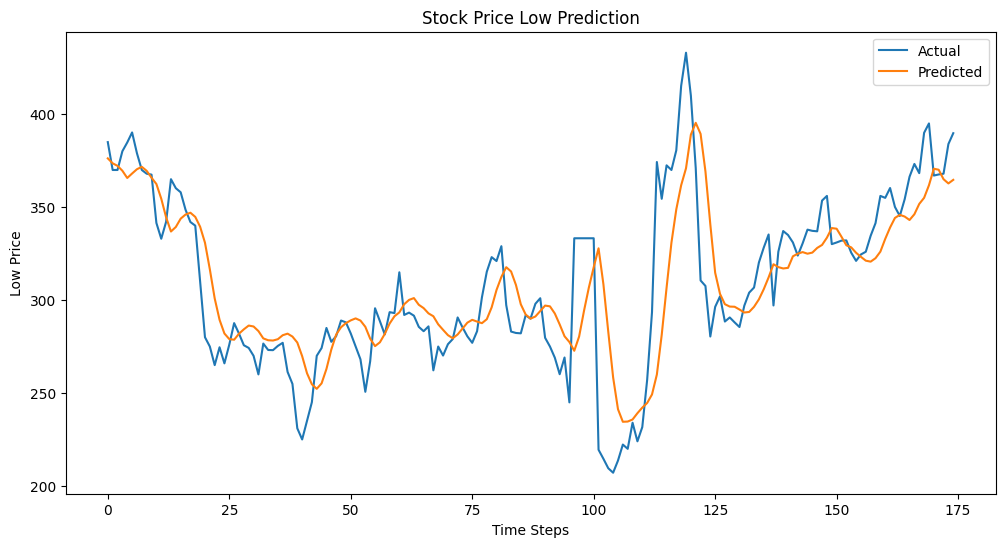

1/1 [==============================] - 0s 22ms/step
Predicted Values for Next 112 Time Steps:
[[364.6938 ]
 [355.48846]
 [347.19574]
 [339.83157]
 [333.46094]
 [328.02484]
 [323.4921 ]
 [319.7854 ]
 [316.80258]
 [314.43323]
 [312.57068]
 [311.11847]
 [309.99347]
 [309.12384]
 [308.45044]
 [307.9305 ]
 [307.53003]
 [307.22208]
 [306.98557]
 [306.80414]
 [306.6651 ]
 [306.5586 ]
 [306.47705]
 [306.41464]
 [306.36685]
 [306.33032]
 [306.3024 ]
 [306.28104]
 [306.26468]
 [306.25217]
 [306.2426 ]
 [306.23532]
 [306.2297 ]
 [306.22543]
 [306.22217]
 [306.2197 ]
 [306.21777]
 [306.2163 ]
 [306.2152 ]
 [306.21436]
 [306.2137 ]
 [306.2132 ]
 [306.21283]
 [306.21252]
 [306.2123 ]
 [306.21213]
 [306.212  ]
 [306.2119 ]
 [306.21182]
 [306.21176]
 [306.21173]
 [306.2117 ]
 [306.21167]
 [306.21167]
 [306.21164]
 [306.21164]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.211

In [2]:
# train for bdl Low
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your stock dataset
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Specify your desired start and end dates
start_date='04-02-2018'
end_date='09-08-2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]



# Filter the data based on the specified date range
# filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract the 'Low' column for modeling
data = dftrain['bdl_Low'].values.reshape(-1, 1)
# data_test=dftest['bdl_Low'].values.reshape(-1, 1)

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# data_test=scaler.transform(data_test)


# Create sequences and labels for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5 # Adjust this based on your dataset and task
X_train, y_train = create_sequences(data, sequence_length)
# X_test, y_train = create_sequences(data_test, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(25, activation='relu', input_shape=(sequence_length, 1) ,return_sequences= True))
model.add(LSTM(10, activation='relu', return_sequences= False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions
y_pred = model.predict(X_train)

# Inverse transform the predictions and actual values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_train = scaler.inverse_transform(y_train)

# Calculate RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)
mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price Low Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Low Price')
plt.show()

# Predict the next 112 values (36 + 76)
predicted_values_next_76 = []

# Use the last sequence from the test data as the initial input
current_input = X_train[-1]

# Predict the next 112 values
for _ in range(76):
    current_input = current_input.reshape(1, sequence_length, 1)
    next_value = model.predict(current_input)
    predicted_values_next_76.append(next_value[0][0])
    current_input = np.roll(current_input, -1)
    current_input[-1] = next_value

# Inverse transform the predicted values to the original scale
predicted_values_next_76 = scaler.inverse_transform(np.array(predicted_values_next_76).reshape(-1, 1))

# Now, predicted_values_next_112 contains the predictions for the next 112 time steps
print("Predicted Values for Next 112 Time Steps:")

print(predicted_values_next_76)


6/6 [==============================] - 0s 8ms/step
Root Mean Squared Error (RMSE): 29.84898834689907
Mean Absolute Error (MAE): 20.537400176344867
Mean Absolute Percentage Error (MAPE): 6.30%


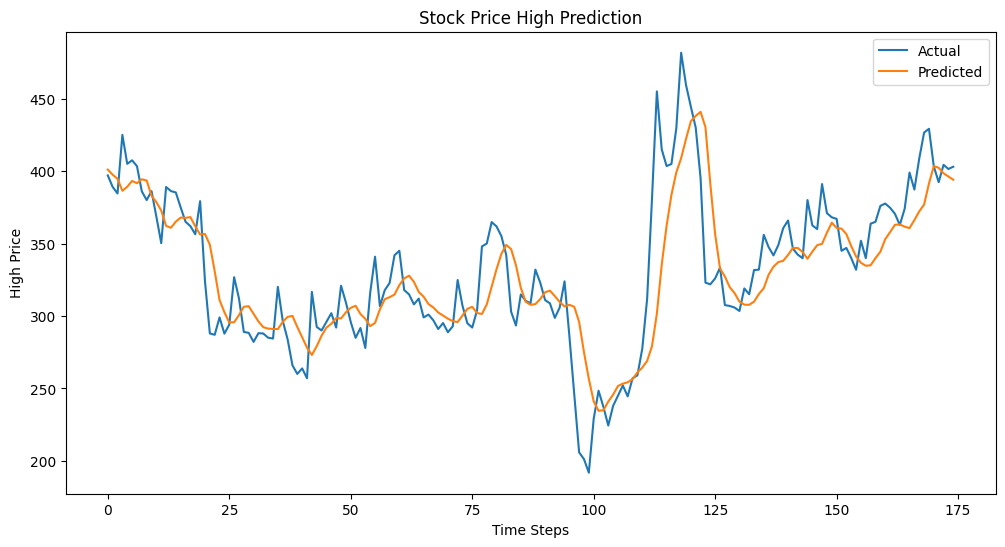

1/1 [==============================] - 0s 19ms/step
Predicted Values for Next 112 Time Steps:
[[394.0371 ]
 [383.37152]
 [373.07962]
 [363.27795]
 [354.19843]
 [346.03748]
 [338.8198 ]
 [332.58847]
 [327.29086]
 [322.88742]
 [319.2959 ]
 [316.41187]
 [314.12494]
 [312.32956]
 [310.93127]
 [309.8489 ]
 [309.01175]
 [308.36377]
 [307.86374]
 [307.47864]
 [307.18256]
 [306.95526]
 [306.7809 ]
 [306.6473 ]
 [306.54495]
 [306.4666 ]
 [306.40662]
 [306.36075]
 [306.32568]
 [306.2988 ]
 [306.2783 ]
 [306.26257]
 [306.25058]
 [306.2414 ]
 [306.2344 ]
 [306.22903]
 [306.2249 ]
 [306.2218 ]
 [306.2194 ]
 [306.21753]
 [306.21613]
 [306.2151 ]
 [306.21426]
 [306.21362]
 [306.21317]
 [306.2128 ]
 [306.2125 ]
 [306.21228]
 [306.21213]
 [306.212  ]
 [306.2119 ]
 [306.21182]
 [306.21176]
 [306.21173]
 [306.2117 ]
 [306.21167]
 [306.21167]
 [306.21164]
 [306.21164]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.2116 ]
 [306.211

In [3]:
# test for bdl high
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your stock dataset
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


start_date_test='16-08-2021'
end_date_test='27-01-2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

# Filter the data based on the specified date range
# filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract the 'High' column for modeling

data_test=dftest['bdl_High'].values.reshape(-1, 1)

# Normalize the data (scaling between 0 and 1)
# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)
data_test=scaler.transform(data_test)


# Create sequences and labels for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5 # Adjust this based on your dataset and task

X_test, y_test = create_sequences(data_test, sequence_length)

# Build the LSTM model
# model = Sequential()
# model.add(LSTM(25, activation='relu', input_shape=(sequence_length, 1) ,return_sequences= True))
# model.add(LSTM(10, activation='relu', return_sequences= False))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.summary()

# Train the model
# model.fit(X_test, y_test, epochs=50, batch_size=64)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price High Prediction')
plt.xlabel('Time Steps')
plt.ylabel('High Price')
plt.show()

# Predict the next 112 values (36 + 76)
predicted_values_next_76 = []

# Use the last sequence from the test data as the initial input
current_input = X_test[-1]

# Predict the next 112 values
for _ in range(112):
    current_input = current_input.reshape(1, sequence_length, 1)
    next_value = model.predict(current_input)
    predicted_values_next_76.append(next_value[0][0])
    current_input = np.roll(current_input, -1)
    current_input[-1] = next_value

# Inverse transform the predicted values to the original scale
predicted_values_next_76 = scaler.inverse_transform(np.array(predicted_values_next_76).reshape(-1, 1))

# Now, predicted_values_next_112 contains the predictions for the next 112 time steps
print("Predicted Values for Next 112 Time Steps:")

print(predicted_values_next_76)


In [ ]:
# train for bdl Low
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your stock dataset
df = pd.read_csv('TimeSeriesDatasetModified.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Specify your desired start and end dates
start_date='04-02-2018'
end_date='09-08-2021'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]



# Filter the data based on the specified date range
# filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract the 'Low' column for modeling
data = dftrain['bdl_Low'].values.reshape(-1, 1)
# data_test=dftest['bdl_Low'].values.reshape(-1, 1)

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# data_test=scaler.transform(data_test)


# Create sequences and labels for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 5 # Adjust this based on your dataset and task
X_train, y_train = create_sequences(data, sequence_length)
# X_test, y_train = create_sequences(data_test, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(25, activation='relu', input_shape=(sequence_length, 1) ,return_sequences= True))
model.add(LSTM(10, activation='relu', return_sequences= False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Make predictions
y_pred = model.predict(X_train)

# Inverse transform the predictions and actual values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_train = scaler.inverse_transform(y_train)

# Calculate RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)
mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price Low Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Low Price')
plt.show()

# Predict the next 112 values (36 + 76)
predicted_values_next_76 = []

# Use the last sequence from the test data as the initial input
current_input = X_train[-1]

# Predict the next 112 values
for _ in range(76):
    current_input = current_input.reshape(1, sequence_length, 1)
    next_value = model.predict(current_input)
    predicted_values_next_76.append(next_value[0][0])
    current_input = np.roll(current_input, -1)
    current_input[-1] = next_value

# Inverse transform the predicted values to the original scale
predicted_values_next_76 = scaler.inverse_transform(np.array(predicted_values_next_76).reshape(-1, 1))

# Now, predicted_values_next_112 contains the predictions for the next 112 time steps
print("Predicted Values for Next 112 Time Steps:")

print(predicted_values_next_76)
